<a href="https://colab.research.google.com/github/sinchana-2006/Calculator/blob/main/Csvworking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

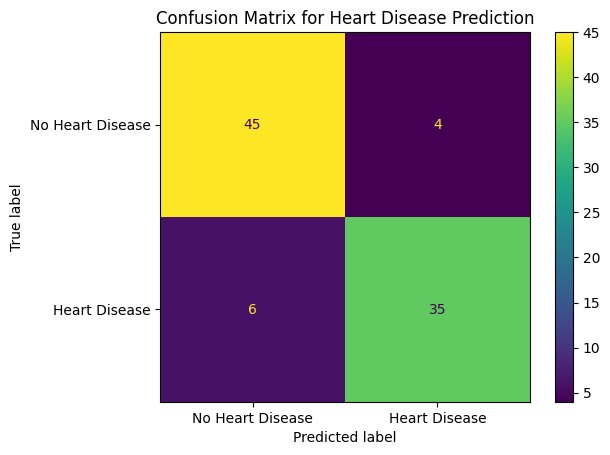

Accuracy: 88.89%

Patient Details in Test Set (showing first 5 patients):
Name: Patient 167
BP Level: 112.0
Medication: MedB
True Diagnosis: No Heart Disease
Predicted Diagnosis: No Heart Disease
----------------------------------------
Name: Patient 211
BP Level: 112.0
Medication: MedC
True Diagnosis: Heart Disease
Predicted Diagnosis: No Heart Disease
----------------------------------------
Name: Patient 63
BP Level: 135.0
Medication: MedB
True Diagnosis: No Heart Disease
Predicted Diagnosis: No Heart Disease
----------------------------------------
Name: Patient 154
BP Level: 130.0
Medication: MedB
True Diagnosis: Heart Disease
Predicted Diagnosis: Heart Disease
----------------------------------------
Name: Patient 5
BP Level: 120.0
Medication: MedC
True Diagnosis: No Heart Disease
Predicted Diagnosis: No Heart Disease
----------------------------------------


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=column_names, na_values="?")

# Drop rows with missing values
df.dropna(inplace=True)

# Adding additional columns for the example
df['name'] = ["Patient " + str(i) for i in range(len(df))]  # Simulated patient names
df['medication'] = np.random.choice(["MedA", "MedB", "MedC"], size=len(df))  # Simulated medication
df['bp_level'] = df['trestbps']  # BP level using the resting blood pressure column
df['diagnosis'] = df['target'].apply(lambda x: "Heart Disease" if x > 0 else "No Heart Disease")

# Define features and target
X = df.drop(columns=['target', 'name', 'medication', 'bp_level', 'diagnosis'])  # Exclude added details from features
y = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binarize target

# Split data into training and testing sets
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df.index, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix for Heart Disease Prediction")
plt.show()

# Print accuracy
print("Accuracy: {:.2f}%".format(100 * accuracy))

# Print additional details for a subset of patients in the test set
print("\nPatient Details in Test Set (showing first 5 patients):")
for idx, true_label, pred_label in zip(idx_test[:5], y_test[:5], y_pred[:5]):  # Limiting to first 5
    print(f"Name: {df.loc[idx, 'name']}")
    print(f"BP Level: {df.loc[idx, 'bp_level']}")
    print(f"Medication: {df.loc[idx, 'medication']}")
    print(f"True Diagnosis: {df.loc[idx, 'diagnosis']}")
    print(f"Predicted Diagnosis: {'Heart Disease' if pred_label == 1 else 'No Heart Disease'}")
    print("-" * 40)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
# Import the matplotlib library
import matplotlib.pyplot as plt

# Load the Heart Disease dataset
# ... (rest of the code remains the same)